### Lab 3 svd
#### Created by: Anna Akhlamova

In [17]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Task 1

In [18]:
def svd(A):
    m, n = A.shape
    r = min(m, n)
    eigvalsv, V = np.linalg.eigh(A.T @ A)
    idx = np.argsort(eigvalsv)[::-1]
    V = V[:, idx]
    sigma = np.sqrt(np.maximum(eigvalsv[idx], 0.0))[:r]
    Sigma = np.diag(sigma)
    U = np.zeros((m, r))
    for i in range(r):
        if sigma[i] != 0:
            U[:, i] = A @ V[:, i] / sigma[i]
        else:
            u = np.random.randn(m)
            for j in range(i):
                proj = np.dot(U[:, j], u) * U[:, j]
                u = u - proj
            norm_u = np.linalg.norm(u)
            if norm_u < 1e-12:
                u = np.zeros(m)
                u[i % m] = 1.0
                norm_u = 1.0
    Vt = V[:, :r].T
    return U, Sigma, Vt

A = np.array([[1, 2, 0, 4],
              [2, 4, 5, 1],
              [3, 1, 7, -2]])

U, S, Vt = svd(A)
A_reconstructed = U @ S @ Vt

print("Відновлена A:")
print(np.round(A_reconstructed))
print("Оригінальна A:")
print(A)

Відновлена A:
[[ 1.  2. -0.  4.]
 [ 2.  4.  5.  1.]
 [ 3.  1.  7. -2.]]
Оригінальна A:
[[ 1  2  0  4]
 [ 2  4  5  1]
 [ 3  1  7 -2]]


### Task 2

In [32]:
file_path = 'D:\\Anna_Akhlamova\\linear_algebra\\lab3\\ml-latest-small\\ratings.csv'
df = pd.read_csv(file_path)
ratings_matrix = df.pivot(index='userId', columns='movieId',
values='rating')
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [20]:
ratings_matrix = ratings_matrix.dropna(thresh=50, axis=0)#drop users with fewer than 50 rating movies
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)#drop films with number of rating less than 100
ratings_matrix

movieId,1,2,10,32,34,47,50,110,150,153,...,6377,6539,6874,7153,7361,7438,8961,33794,58559,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,5.0,5.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,3.0,4.0,4.0,4.0,1.0,5.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,4.5,NaN,4.5,NaN,...,NaN,4.5,NaN,4.0,NaN,NaN,4.0,2.0,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,4.0,NaN,NaN,2.5,5.0,4.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,NaN,NaN,NaN,NaN,NaN,3.0,5.0,4.0,...,NaN,5.0,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN
606,2.5,NaN,NaN,4.0,NaN,3.0,4.5,3.5,NaN,NaN,...,4.0,3.0,4.5,4.5,4.0,4.5,4.0,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,3.0,NaN,NaN,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ratings_without_none= ratings_matrix.T.fillna(round(ratings_matrix.T.mean())).T# change nan to average for film
R = ratings_without_none.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [22]:
U, sigma, Vt = svds(R_demeaned, k=3)
U

array([[-0.09283648, -0.00072523,  0.06227001],
       [-0.13944375, -0.00943484,  0.02674854],
       [ 0.03046852, -0.12445884, -0.03329131],
       ...,
       [ 0.07954084, -0.05455295,  0.00516235],
       [ 0.07539407,  0.00113642,  0.14745229],
       [-0.13493171,  0.01107852,  0.07770004]], shape=(385, 3))

In [23]:
def plot_data(mat, data_type):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for index, row in mat.iterrows():
        ax.scatter(row[0], row[1], row[2], alpha=0.8)
        ax.text(row[0], row[1], row[2],'{0} {1}'.format(data_type, index), size=10)
    plt.show()

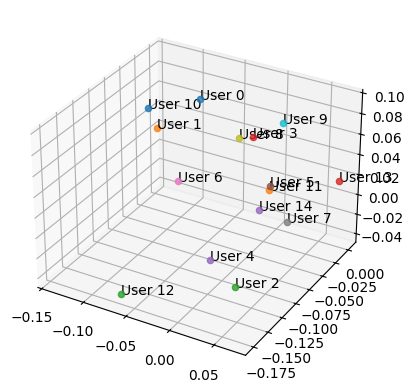

In [24]:
U_df = pd.DataFrame(U)
plot_data(U_df.head(15), "User")

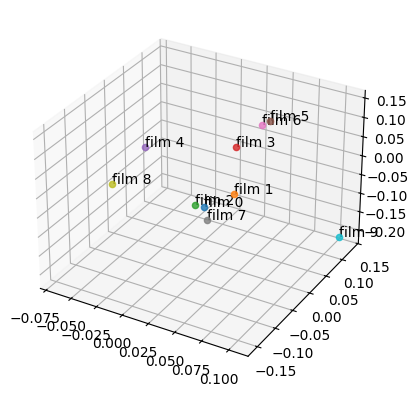

In [25]:
Vt_df = pd.DataFrame(Vt)
plot_data(Vt_df.T.head(10), "film")

In [26]:
sigma_diag = np.diag(sigma)
all_user_predicted_ratings = np.dot (np.dot (U, sigma_diag), Vt) + user_ratings_mean.reshape(-1, 1)
pred_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)
pred_only = pred_df.copy()
pred_only[ratings_matrix.notna()] = np.nan #для всі фільмів які юзер оцінював поставимо нан бо їхній прогноз нас вже не цікавить

In [27]:
movies_path = r'D:\Anna_Akhlamova\linear_algebra\lab3\ml-latest-small\movies.csv'
movies_df = pd.read_csv(movies_path)

In [28]:
def recommend_for_user(user_id, preds_only, movies_df, n_recommendations):
    user_pred = preds_only.loc[user_id]
    user_pred = user_pred.dropna().sort_values(ascending=False).head(n_recommendations)
    recommended_movie_ids = user_pred.index.values
    movies_subset = movies_df.set_index('movieId').reindex(recommended_movie_ids)
    movies_subset['predicted_rating'] = user_pred.values
    return movies_subset


In [29]:
recommend_for_user(10, pred_df, movies_df, 10)

,title,genres,predicted_rating
movieId,,,
780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,3.495905
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.443957
2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,3.416374
1580,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi,3.360619
457,"Fugitive, The (1993)",Thriller,3.340167
648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller,3.325123
356,Forrest Gump (1994),Comedy|Drama|Romance|War,3.311783
3793,X-Men (2000),Action|Adventure|Sci-Fi,3.310102
377,Speed (1994),Action|Romance|Thriller,3.296798


In [30]:
recommend_for_user(62, pred_df, movies_df, 10)

,title,genres,predicted_rating
movieId,,,
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.788239
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.720176
2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.629572
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.569585
527,Schindler's List (1993),Drama|War,4.551066
858,"Godfather, The (1972)",Crime|Drama,4.540518
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.533257
4226,Memento (2000),Mystery|Thriller,4.525217
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.521646
